



# Project: Investigate a Dataset (information about 100,000 no-show medical appointments in Brazil)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The following analysis reflects a single data set from over 100000 medical appointments in Brazil.  Each entry includes characteristics about the patient and appointment in addition to another column that determines whether or not the appointment is a no-show.  Through use of data analysis, correlation between several of the appointment and patient characteristics are treated as indepentent variables and measured against the no-show status of each appointment.  The no-show status is treated as the single dependent variable and is scrutinized via the following questions:
>
> **Question 1:** Are there any specific factors that might indicate whether or not a patient will show up to their appointment?
>>-*This question is posed in an open form and necessitates measuring counts of no-shows vs. several independent variables*
>
> **Question 2:** Have the number of no-shows changed over time?
>
>>-*This question simply asks whether or not the occurence of no-shows is changing over time in any way. This only requires measuring the amount of no-show vs show appointments grouped by the timestamp of each appointment.

**Step:** Below, the packages of pandas and matplotlib are loaded with their standard aliases in order to use dataframes, essential numpy methods and create the appropriate visualizations.  Additionally, seaborn is imported as sns with the single line: sns.set().  This will provide the basic seaborn formatting in all of the following visualizations for background clarity.  Finally, the matplotlib inline magic statement ensures that each visualization is provided within this notebook.

In [1]:
#import packages and format backgrounds with seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

<a id='wrangling'></a>
## Data Wrangling


### General Properties

**Step 1:** Below, the built in pandas function for reading .csv files is used and assigned to the df variable for the rest of the analysis.  Additionally the df.head() function is used to view the fist five lines of data.  This helps clarify the format of the collumns and index labels.  It looks like the index labels need to be adjusted for consistent format, but the values of the collumns appear to have appropriate characters.

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Step 2:** In order to find null values, data types and dataframe shape, the following fuction is executed.  Most of the columns appear to  be appropriately formatted with the exception of the two day collumns, which need to be changed to datetime.  With 110527 rows, loops should not be executed throughout the entirety of the data for efficiency.  Finally, there appear to be no null values, which is amazing.

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**Step 3:** Although this is unnecessary, another function to count the number of null values is run just to confirm the unlikely absence of null values. 

In [4]:
# sum of df null values by column
df.isna().sum()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

**Step 3:** Finally, the unique values of the one dependent variable are listed below.  It is important that these values are consistant for further analysis, which they clearly are. 

In [5]:
#list unique no_show values
df['No-show'].unique()


array(['No', 'Yes'], dtype=object)



### Data Cleaning (reformatted column labels, dropped unnecessary collumns, and changed datatype of date column)
>The steps here are minimal as the data is already very clean.

**Step 1:** First, the .rename method is used.  It applies a loop over the column names and changes all the characters to lower-case.  Additionally, the 'no-show' column has a hyphen rather than the standard underscore.  As a matter of convenience, this is replaced in the same function.  Afterward, the first entry is previewed in order to confirm the column changes.


In [6]:
#loop over column names to change all titles to lowercase and change hyphens to underscores
df.rename(columns=lambda x: x.lower().replace("-","_"), inplace=True)
df.head(1)


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


**Step 2:** Next the unnecessary columns that are not used in this analysis are simply dropped.  Although these columns may be used to ask further questions, they are not used in this case.

In [7]:
#drop unnecessary columns
df.drop(['patientid','appointmentid','scheduledday','neighbourhood'], axis=1, inplace=True)
df.head(1)


,gender,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No


**Step 3:** Finally, the to_datetime function is used to change the 'appointmentday' column datatyp from string to the datetime format.  This is set equal to the df.column in order for the change to be inplace. 

In [8]:
#change column from string to datetime format
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
gender            110527 non-null object
appointmentday    110527 non-null datetime64[ns, UTC]
age               110527 non-null int64
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
dtypes: datetime64[ns, UTC](1), int64(7), object(2)
memory usage: 8.4+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Are there any specific factors that might indicate whether or not a patient will show up to their appointment?)

### Comparison of five patient traits and no-show status

**Step 1:** In order to compare patient traits to 'no_show' status, five trait columns need to be compared at once.  The columns: hipertension, diabetes, alcoholism, handcap and sms_received are selected with the .iloc method and grouped by the variable: traits.  

Since each trait is counted as an integer value of 1 or 0 and the no show status is either Yes or No, the sum of trait values need to be divided by the count of yes and no responses for each trait.  this is completed with two variables in order to compare proportions of traits for no_show status.  The following cell of code and and three tables demonstrate this operation. 

In [9]:
#group five traits by noshow status as the variable: traits
traits = df.iloc[:,4:10].groupby(['no_show'])

#assign count and sum functions to traits 
trait_counts = traits.count()
trait_sums = traits.sum()

#divide the tables by eachother to create proportions
proportions = trait_sums / trait_counts


In [10]:
trait_sums

,hipertension,diabetes,alcoholism,handcap,sms_received
no_show,,,,,
No,18029,6513,2683,2006,25698
Yes,3772,1430,677,453,9784


In [11]:
trait_counts

,hipertension,diabetes,alcoholism,handcap,sms_received
no_show,,,,,
No,88208,88208,88208,88208,88208
Yes,22319,22319,22319,22319,22319


In [12]:
proportions

,hipertension,diabetes,alcoholism,handcap,sms_received
no_show,,,,,
No,0.204392,0.073837,0.030417,0.022742,0.291334
Yes,0.169004,0.064071,0.030333,0.020297,0.438371


**Step 2:** With the proportions data, the .transpose() method is applied in order to subplot the correct index with the following group bar chart. 

As illustrated by the chart, there is only a significant difference between Yes and No answers to to no_show column for those that recieved and SMS.

Text(0, 0.5, 'propotion of appointments')

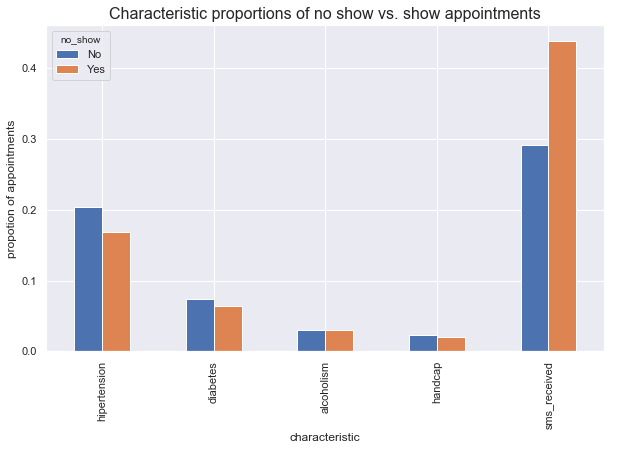

In [13]:
#transpose and plot barchart
proportions.transpose().plot(kind="bar",figsize=(10,6))

plt.title('Characteristic proportions of no show vs. show appointments', fontsize=16)
plt.xlabel('characteristic')
plt.ylabel('propotion of appointments')


### Comparison of gender and no-show status

**Step 1:** In order to compare no-show status to gender, only the 'gender' and 'no_show' columns are needed.  These columns are selected and grouped by each of their 'yes' or 'no' answers. Then the values are counted.

In [14]:
#group and count appointments by gender and no_show answer
gender_sums = df.iloc[:,[0,9]].groupby(['gender', 'no_show'])['no_show'].count()
gender_sums


gender  no_show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: no_show, dtype: int64

**Step 2:** Since these counts vary in total by gender, they are each asigned a ratio of 'Yes' vs 'No' answers.

In [15]:
#divide each genders no_show values by eachother to create a ratio
f_noshow_ratio = gender_sums['F']['Yes'] / gender_sums['F']['No']
m_noshow_ratio = gender_sums['M']['Yes'] / gender_sums['M']['No']


**Step 3:** With the pyplot.bar function, the two ratios are presented in a bar chart.  Clearly, the amount of no-shows by gender do not vary significantly.

Text(0, 0.5, 'Ratio of No-shows / shows')

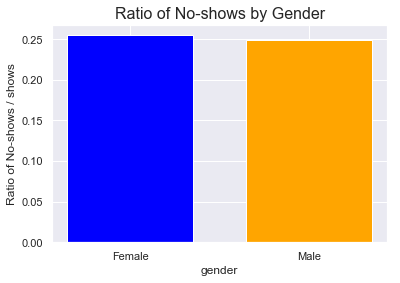

In [16]:
# bar plot the two ratios
plt.bar(range(2), [f_noshow_ratio, m_noshow_ratio], width=.7, color=['blue', 'orange'], tick_label = ['Female', 'Male'])
plt.title('Ratio of No-shows by Gender', fontsize=16)
plt.xlabel('gender')
plt.ylabel('Ratio of No-shows / shows')


### Comparison of age distribution and no-show status

**Step 1:** In order to compare distributions of age based on no_shows, two separate dataframes that only include the no_show status and age are created.  the yes_ages data frame included no_shows while the no_ages data frame includes all the other appointments.

In [17]:
#create two new dataframes split by no_show answer with only the age column
yes_ages = df[df['no_show'] == 'Yes'].age
no_ages = df[df['no_show'] == 'No'].age


**Step 2:**  With these two seperate distributions of age, side by side box plots are easily created with pyplot.

Text(0, 0.5, 'Age')

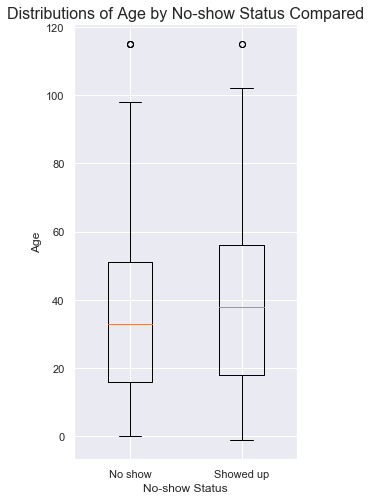

In [18]:
#boxplot the dristributions of the two age distributions
plt.figure(figsize=(4,8))
plt.boxplot([yes_ages, no_ages], widths = .4, labels=['No show', 'Showed up'])
plt.title('Distributions of Age by No-show Status Compared', fontsize=16)
plt.xlabel('No-show Status')
plt.ylabel('Age')


**Step 3:** There appears to be a slight difference in the distribution of no_show appointment ages, especially for the mean values.  To see more, the .describe() method is used to see statistics of each age distribution.  There appears to be a little more than three year decrease in mean age for no-show appointments.  

In [19]:
yes_ages.describe()


count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: age, dtype: float64

In [20]:
no_ages.describe()


count    88208.000000
mean        37.790064
std         23.338878
min         -1.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: age, dtype: float64

### Research Question 2  (Have the proportions of no-shows changed over time?)

**Step 1:** In order to compare no-show status over time, a ratio of no-show vs show appointments of each day must be determined.  First, two separate dataframes divided by no-show status are created.

In [21]:
#create two dataframes based on no_show answer
df_show = df[df['no_show'] == 'No']
df_noshow =df[df['no_show'] == 'Yes']


**Step 2:** Next, the count of no_show answers in each dataframe are grouped by appointment day.

In [22]:
#group no_show counts by appointmentday 
no_show_days = df_noshow.groupby(['appointmentday'])['no_show'].count()
show_days = df_show.groupby(['appointmentday'])['no_show'].count()


**Step 3:** Finally, the ratio of no_show_days / show_days is calculated in a new dataframe and a line chart is created with pyplot.

There appears to be no significant trend over time.

Text(0, 0.5, 'Ratio of no-show, vs show')

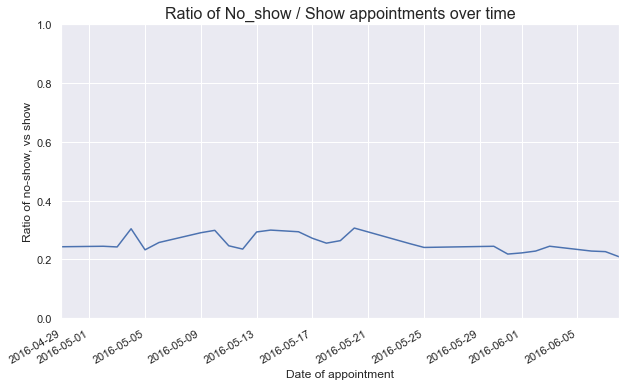

In [23]:
#divide to create a ratio
proportions = no_show_days / show_days

#line plot the ratio of no_show appointments by day
proportions.plot(figsize=(10,6),ylim=(0,1))
plt.title('Ratio of No_show / Show appointments over time', fontsize=16)
plt.xlabel('Date of appointment')
plt.ylabel('Ratio of no-show, vs show')


<a id='conclusions'></a>
## Conclusions

> In the above analysis, the first question asked was if any specific appointment factors effected whether or not they might show up to an appointment.  With this in consideration, age, gender and five other characteristics were compared.  There appeared to be no significant differences based on age or four of the five characteristics.  Of note is the fact that a higher proportion of no-show appointments did recieve an SMS notification.  Additionally, the mean age of no shows is approximately three years less. Perhaps the SMS status is correlated with the mean age of no-show appointments.  Despite the correlation of no-show answer, age and SMS status, no conclusions can be drawn from the data about causation.  Clearly, more explanation and/or analysis is needed. 
>
>In the second question, any trend over time of no-show appointments were in quesiton.  As clearly seen by the line chart of ratios by appointment day, there is no indication of a signifiscant trend.  
>
>In reflection of these data, it is clear that there are limitations on what can be accomplished with such a small dataset.  The sample of appointments is large, but they cover a period barely including three months.  In order for any significant trends of no_show appointments to be conclusive, a long enough time period would need to be observed.  Additionally, the simple characteristics of patients assigned to a value can only suggest a correlation.  In turn, only more questions about potential lurking variables are raised.  Perhaps those who are younger do not show up to as many appointments because they have disruptive working hours?